# Ex6: To implement a Machine Learning Classification model using a Decision Tree Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [39]:
# Read dataset
data = pd.read_csv(r"C:\Users\Hp\Desktop\tennis - tennis.csv")

## EDA

In [40]:
data.shape

(14, 5)

In [41]:
data.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [42]:
data.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


## Data Preprocessing

In [43]:
# Handle any missing values if present
data.dropna(inplace=True)


In [44]:
data.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [48]:
# Convert categorical variablesinto numerical representations
data = pd.get_dummies(data, drop_first=True)

In [49]:
# Split features and target variable;des
X = data.drop('play_yes', axis=1)  # Features
y = data['play_yes']  # Target variable


## Implementing the Classification Model

In [34]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [43]:
# Create a Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier()


# Use GridSearchCV to find the best hyperparameters

In [44]:

params = {'max_depth': [2, 3, 4, 5], 'min_samples_split': [2, 3, 4, 5]}
grid_search = GridSearchCV(dt_classifier, params, cv=StratifiedKFold(n_splits=4))  # Use n_splits=4
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [45]:
best_dt_classifier = grid_search.best_estimator_

# Train the model on the training data

In [46]:

best_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [47]:
# Evaluate the model on the testing data
y_pred = best_dt_classifier.predict(X_test)


## Evaluation Metrics

In [55]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


In [56]:

# Print evaluation metrics and confusion matrix
print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Evaluation Metrics:
Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]


In [57]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

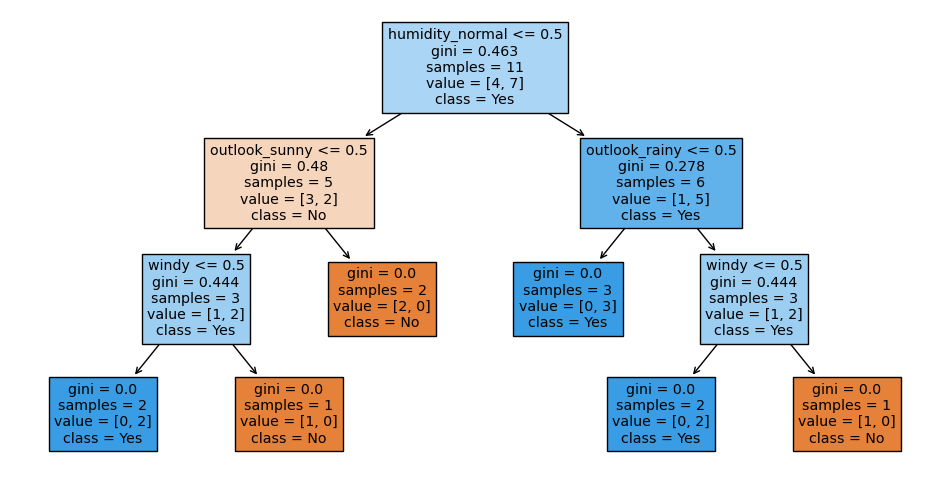

In [58]:
# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(best_dt_classifier, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

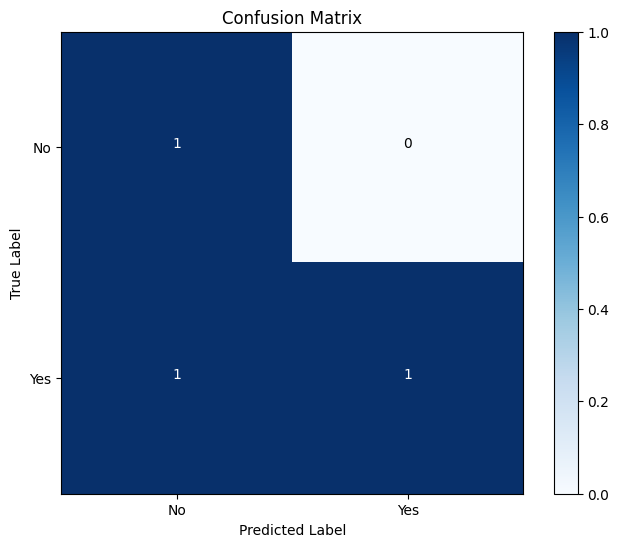

In [59]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]
plt.xticks(tick_marks, ['No', 'Yes'])
plt.yticks(tick_marks, ['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, format(conf_matrix[i, j], 'd'), horizontalalignment="center", color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()

#  K-Fold Cross-Validation

In [60]:
k_fold_scores = cross_val_score(best_dt_classifier, X, y, cv=StratifiedKFold(n_splits=4))  # Use n_splits=4
mean_score = k_fold_scores.mean()
std_dev = k_fold_scores.std()

In [61]:
# Display results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_dev)

Accuracy: 0.6666666666666666
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]
Mean Cross-Validation Score: 0.7291666666666666
Standard Deviation of Cross-Validation Scores: 0.3083051788947655
